#### Importamos librerías

In [1]:
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np

In [2]:
dftrain = pd.read_csv("../Data/train.csv",encoding = "ISO-8859-1")

#### Exploramos el archivo

In [3]:
dftrain.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372


In [4]:
dftrain.price.mean()

3939.026968236312

In [5]:
dftrain.shape

(40455, 11)

In [6]:
# Observamos que tenemos tres variables categóricas
# Comprobamos ahora si existen nulos

In [7]:
dftrain.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
# No hay nulos, procedemos a pasar a números las variables categóricas
# Primero observamos los valores

In [9]:
dftrain.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [10]:
dftrain.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [11]:
dftrain.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [12]:
# Investigando en internet encontramos información sobre el color y la claridad, 
# respecto al color la letra D hace referencia al máximo valor posible, donde el diamante tiene un color impercetible
# así hasta llegar a la Z, que sería el de peor color

# En cuanto a la claridad, también sigue una escala, siendo lo máximo recomendable FL, y en segundo lugar IF
# que quiere decir "ausencia de inclusiones con 10 aumentos(...)" y el peor en la escala sería P3

# A continuación nominalizamos las tres variables categóricas

In [13]:
"""
Empezamos con el corte
"""
dic_corte = {"Fair": 5,
                "Good": 4,
                "Very Good": 3,
                "Premium":2,
                "Ideal":1,
                }

In [14]:
dftrain.cut = dftrain.cut.map(dic_corte)

In [15]:
"""
Seguimos con el color
"""
dic_color = {"D":1,
                "E":2,
                "F":3,
                "G":4,
                "H":5,
                "I":6,
                "J":7,
}

In [16]:
dftrain.color = dftrain.color.map(dic_color)

In [17]:
"""
Y finalizamos con la claridad
"""
dic_claridad = {"IF":1,
                "VVS1":2,
                "VVS2":3,
                "VS1":4,
                "VS2":5,
                "SI1":6,
                "SI2":7,
                "I1":8
}

In [18]:
dftrain.clarity = dftrain.clarity.map(dic_claridad)

#### Estudiamos las correlaciones

In [19]:
corre = dftrain.corr()
corre

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003349,-0.000449,-0.001828,-0.000274,0.007690,-0.007495,-0.003985,-0.003997,-0.003010,-0.004065
carat,-0.003349,1.000000,0.134463,0.292673,0.352151,0.025563,0.181437,0.976119,0.968747,0.969643,0.921128
cut,-0.000449,0.134463,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122,0.123166,0.150823,0.052115
color,-0.001828,0.292673,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814,0.269470,0.274945,0.172244
clarity,-0.000274,0.352151,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832,0.364112,0.373575,0.145062
depth,0.007690,0.025563,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409,-0.031153,0.093987,-0.015052
table,-0.007495,0.181437,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592,0.187326,0.154194,0.127691
x,-0.003985,0.976119,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000,0.991276,0.986062,0.884874
y,-0.003997,0.968747,0.123166,0.269470,0.364112,-0.031153,0.187326,0.991276,1.000000,0.980160,0.880575
z,-0.003010,0.969643,0.150823,0.274945,0.373575,0.093987,0.154194,0.986062,0.980160,1.000000,0.875011


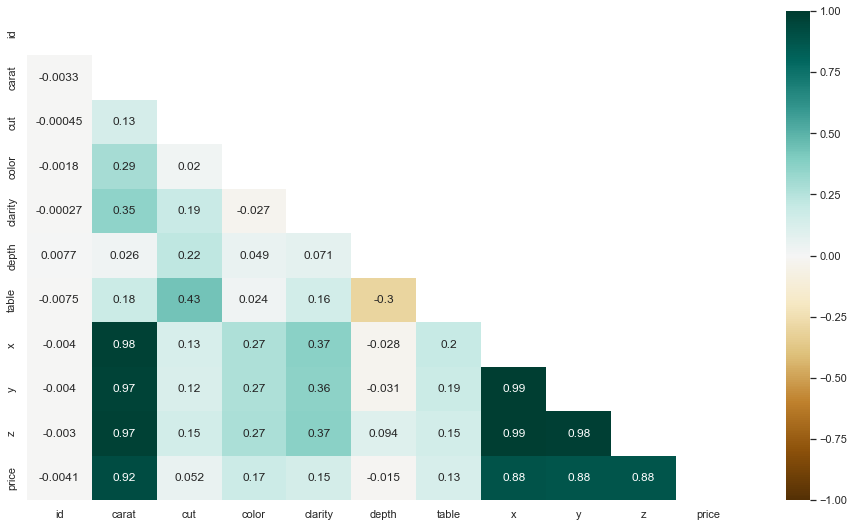

In [20]:
mask = np.triu(np.ones_like(corre, dtype=np.bool))
heatmap = sns.heatmap(corre, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

In [21]:
# eliminamos "x", "y", y "z" por su alta correlación con "carat"
dftrain.drop(['x','y','z'], axis = 1 , inplace = True)

In [22]:
corre2 = dftrain.corr()
corre2

,id,carat,cut,color,clarity,depth,table,price
id,1.000000,-0.003349,-0.000449,-0.001828,-0.000274,0.007690,-0.007495,-0.004065
carat,-0.003349,1.000000,0.134463,0.292673,0.352151,0.025563,0.181437,0.921128
cut,-0.000449,0.134463,1.000000,0.020104,0.190710,0.219509,0.433241,0.052115
color,-0.001828,0.292673,0.020104,1.000000,-0.026766,0.049141,0.023844,0.172244
clarity,-0.000274,0.352151,0.190710,-0.026766,1.000000,0.070941,0.156182,0.145062
depth,0.007690,0.025563,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.015052
table,-0.007495,0.181437,0.433241,0.023844,0.156182,-0.297741,1.000000,0.127691
price,-0.004065,0.921128,0.052115,0.172244,0.145062,-0.015052,0.127691,1.000000


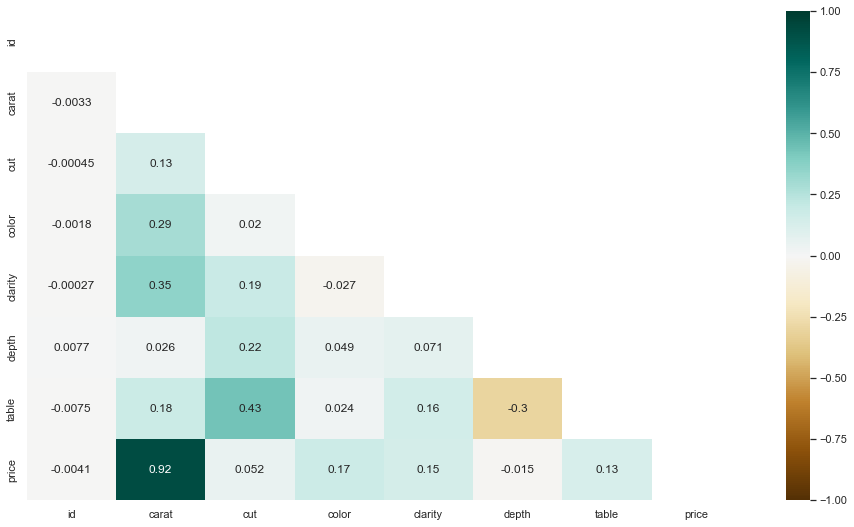

In [23]:
mask = np.triu(np.ones_like(corre2, dtype=np.bool))
heatmap = sns.heatmap(corre2, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

### Probamos la regresión lineal

In [24]:
X = dftrain.drop("price", axis=1)
y = dftrain.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [27]:
y_train_predict = lr.predict(X_train)
metrics.r2_score(y_train, y_train_predict)

0.9030684929277052

In [28]:
y_test_predict = lr.predict(X_test)
metrics.r2_score(y_test, y_test_predict)

0.9099578886743944

In [29]:
mean_squared_error(y_train, y_train_predict)**0.5

1246.0150443554903

In [30]:
metrics.mean_squared_error(y_test, y_test_predict)**0.5

1190.1025495373563

In [31]:
# comprobamos que nos da unos resultados muy flojos

### Probamos el decission tree classifier

In [32]:
model = DecisionTreeClassifier(max_depth=3, random_state=123)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [33]:
model = DecisionTreeClassifier(max_depth=3, random_state=123)
model.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [34]:
metrics.mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))**0.5 

5073.763145044769

In [35]:
mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))**0.5

5023.900974957578

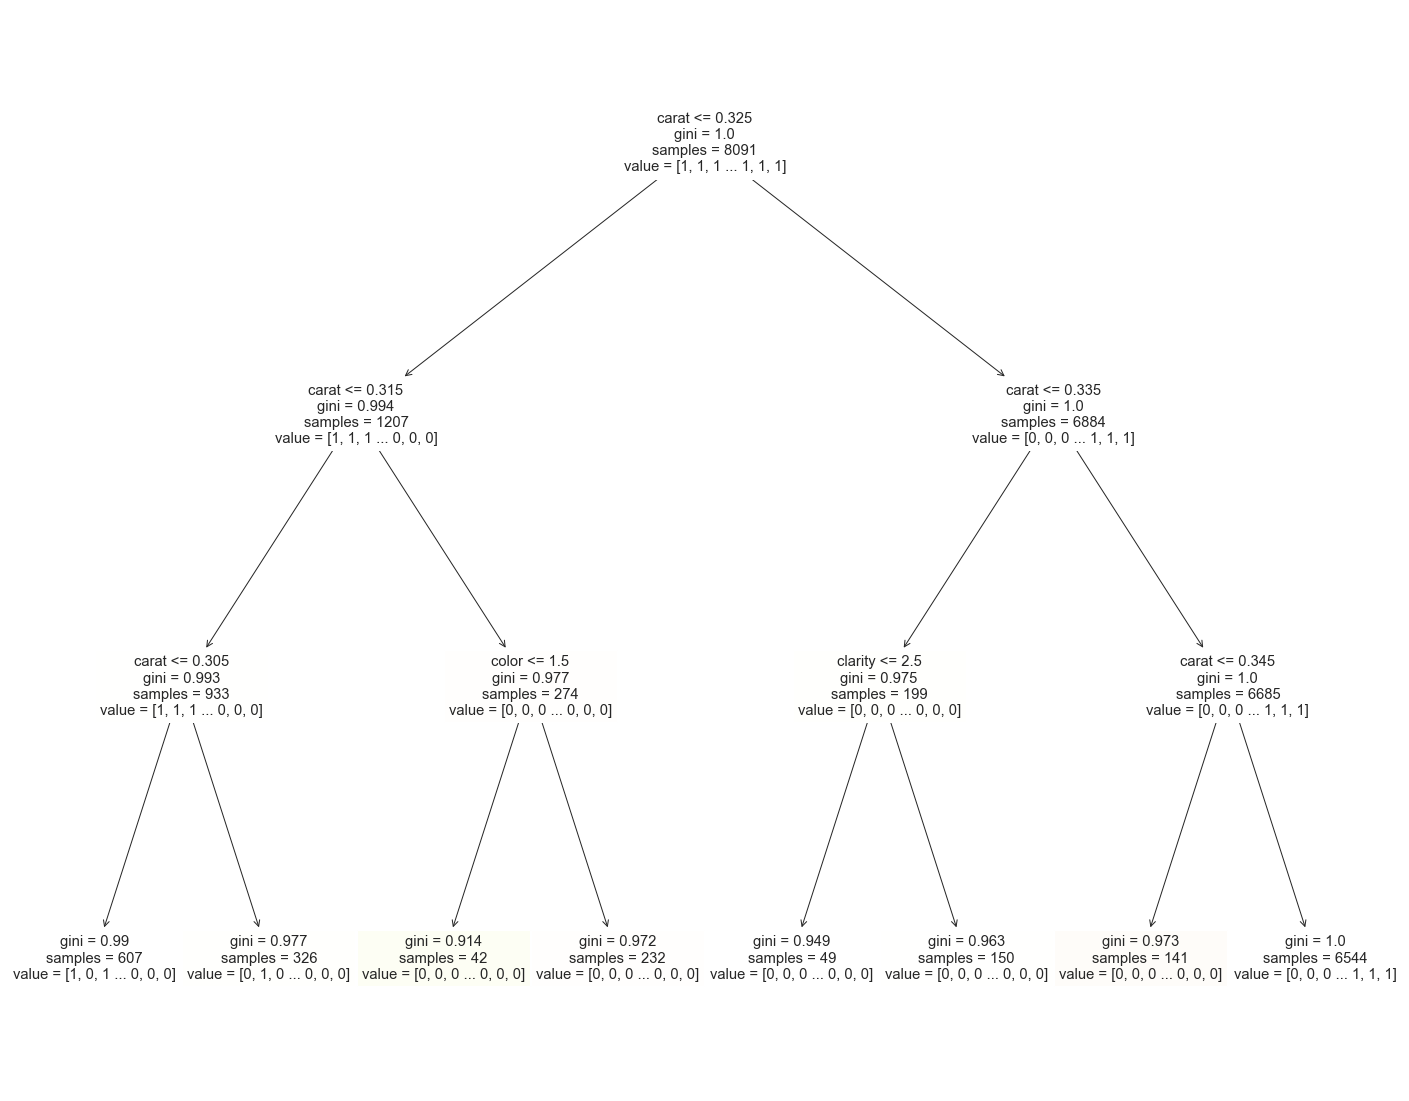

In [36]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=dftrain.columns[:-1], filled=True);

In [37]:
# también nos da resultados débiles

### Probamos el decission tree regressor

In [38]:
results = []

for depth in range(9,15):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train))**0.5,
        "test_error": mean_squared_error(y_test, model.predict(X_test))**0.5
    }
    results.append(result)

In [39]:
df = pd.DataFrame(results)

In [40]:
display(df)

,model,depth,train_error,test_error
0,DecisionTreeRegressor(max_depth=9),9,586.589381,638.523360
1,DecisionTreeRegressor(max_depth=10),10,532.010718,636.954623
2,DecisionTreeRegressor(max_depth=11),11,480.281365,629.506950
3,DecisionTreeRegressor(max_depth=12),12,428.434926,637.439595
4,DecisionTreeRegressor(max_depth=13),13,378.194615,665.655977
5,DecisionTreeRegressor(max_depth=14),14,329.634117,680.410603


In [41]:
X = dftrain.drop("price", axis=1)
y = dftrain.price

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=244)

In [43]:
model = DecisionTreeRegressor(max_depth=12)

In [44]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [45]:
y_predict = model.predict(X_test).round(2)

In [46]:
mean_squared_error(y_test, y_predict) ** 0.5

664.3708222596524

In [47]:
# mejora los resultados anteriores

### Probamos el random forest

In [48]:
X = dftrain.drop("price", axis=1)
y = dftrain.price

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=333)

In [50]:
forest = RandomForestRegressor()

In [51]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
mean_squared_error(y_train,forest.predict(X_train)).round(3)**0.5

206.72680280989206

In [53]:
mean_squared_error(y_test,forest.predict(X_test)).round(3)**0.5

160.9488117383909

In [54]:
# mejor resultado hasta el momento

### Nos traemos el archivo de testeo para aplicarle nuestra mejor predicción

In [55]:
dftest = pd.read_csv("../Data/test.csv",encoding = "ISO-8859-1")

In [56]:
dftest.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69
1,1,0.83,Premium,G,SI1,62.3,58.0,6.01,5.97,3.73


In [57]:
dftest.cut = dftest.cut.map(dic_corte)
dftest.color = dftest.color.map(dic_color)
dftest.clarity = dftest.clarity.map(dic_claridad)

In [58]:
dftest.drop(['x','y','z'], axis = 1 , inplace = True)

In [59]:
pricepredicted = forest.predict(dftest).round(3)

In [60]:
dftest['price'] = pricepredicted

In [61]:
dftest.head(2)

,id,carat,cut,color,clarity,depth,table,price
0,0,1.00,5,7,7,56.3,64.0,3275.87
1,1,0.83,2,4,6,62.3,58.0,2914.67


In [62]:
subN1 = dftest.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axis = 1)
#subN1.to_csv('subN1.csv', index=False)

In [63]:
subN1.head(5)

,id,price
0,0,3275.87
1,1,2914.67
2,2,3486.60
3,3,3122.54
4,4,4941.15


### Estudiamos la distribución de carat (la variable con más correlación con el precio) de los dos data sets para ver si existen diferencias y las ajustamos

In [64]:
prueba1 = dftrain

<AxesSubplot:xlabel='carat', ylabel='Density'>

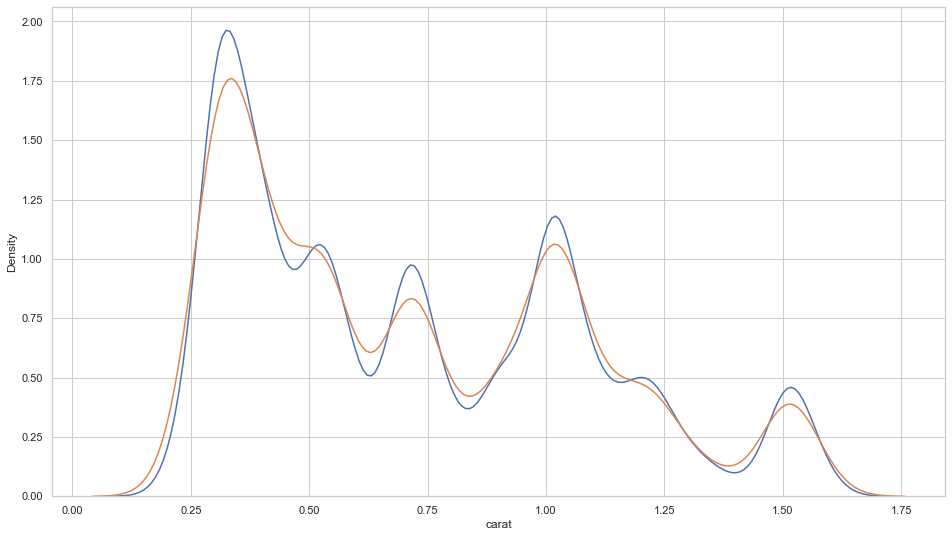

In [65]:
fig, ax = plt.subplots()
p1 = dftrain.loc[(dftrain["carat"] > 0.2) & (dftrain['carat'] <1.6)]
p2 = dftest.loc[(dftest["carat"] > 0.2) & (dftest['carat'] <1.6)]
sns.kdeplot(p1['carat'], ax=ax)
sns.kdeplot(p2['carat'], ax=ax)
# observamos que existen algunas diferencias

In [66]:
# ajustamos las diferencias elimnando algunas de las muestras donde el archivo train tenemos "exceso" de líneas con 
# los valores de carat
prueba2 = prueba1.drop(prueba1.query('0.68 < carat < 0.75').sample(frac=.27).index)
prueba3 = prueba2.drop(prueba2.query('1 < carat < 1.05').sample(frac=.31).index)
prueba4 = prueba3.drop(prueba3.query('1.50 < carat < 1.54').sample(frac=.37).index)
prueba5 = prueba4.drop(prueba4.query('0.51 < carat < 0.54').sample(frac=.41).index)
prueba6 = prueba5.drop(prueba5.query('1.18 < carat < 1.23').sample(frac=.26).index)
prueba10 = prueba6.drop(prueba6.query('0.3 < carat < 0.35').sample(frac=.37).index)

In [67]:
p1 = prueba10.loc[(prueba2["carat"] > 0.2) & (prueba10['carat'] <1.6)]
p2 = dftest.loc[(dftest["carat"] > 0.2) & (dftest['carat'] <1.6)]

<AxesSubplot:xlabel='carat', ylabel='Density'>

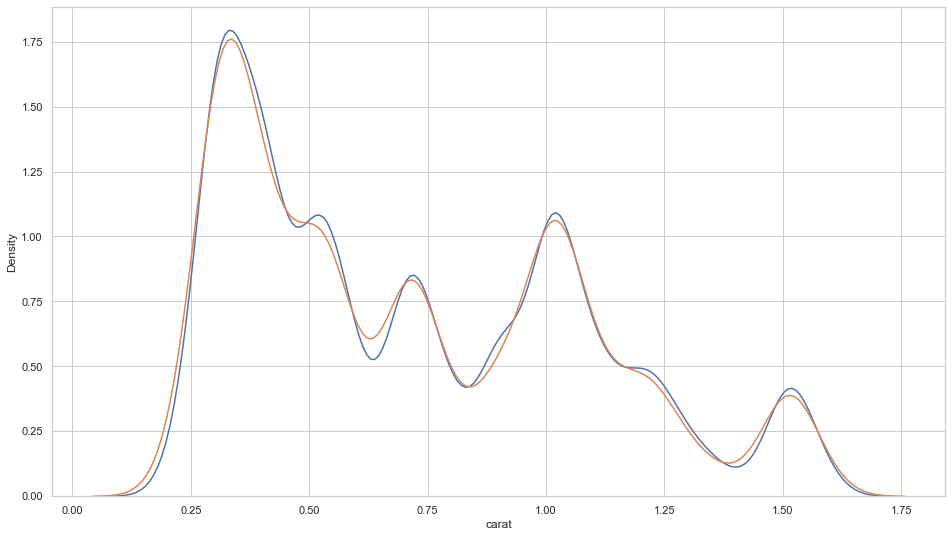

In [68]:
fig, ax = plt.subplots()
sns.kdeplot(p1['carat'], ax=ax)
sns.kdeplot(p2['carat'], ax=ax)

### Probamos el random forest con el data set modificado

In [69]:
X = prueba10.drop("price", axis=1)
y = prueba10.price

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=333)

In [71]:
forest = RandomForestRegressor()

In [72]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
mean_squared_error(y_train,forest.predict(X_train)).round(3)**0.5

212.69068855970164

In [74]:
mean_squared_error(y_test,forest.predict(X_test)).round(3)**0.5

229.60361059878826

In [75]:
dftest5 = pd.read_csv("../Data/test.csv",encoding = "ISO-8859-1")

In [76]:
dftest5.cut = dftest5.cut.map(dic_corte)
dftest5.color = dftest5.color.map(dic_color)
dftest5.clarity = dftest5.clarity.map(dic_claridad)
dftest5.drop(['x','y','z'], axis = 1 , inplace = True)

In [77]:
pricepredicted = forest.predict(dftest5).round(3)

In [78]:
dftest5['price'] = pricepredicted

In [79]:
subN5 = dftest5.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axis = 1)
#subN5.to_csv('subN5.csv', index=False)
subN5.head()

,id,price
0,0,3227.45
1,1,2920.50
2,2,3415.21
3,3,3084.40
4,4,4819.71


In [80]:
# ha mejorado

### Gradient boosting

In [81]:
#X = prueba10.drop("price", axis=1)
#y = prueba10.price

In [82]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=229)

In [83]:
#gb = GradientBoostingRegressor(n_estimators=300, max_depth=10, max_features=8)
#gb.fit(X_train, y_train)

In [84]:
#aa = gb.predict(X_test).round(3)
#mean_squared_error(y_test, aa) ** 0.5

In [85]:
#dftest6 = pd.read_csv("../Data/test.csv",encoding = "ISO-8859-1")

In [86]:
#dftest6.cut = dftest6.cut.map(dic_corte)
#dftest6.color = dftest6.color.map(dic_color)
#dftest6.clarity = dftest6.clarity.map(dic_claridad)

In [87]:
#pricepredicted6 = gb.predict(dftest6).round(3)

In [88]:
#dftest6.drop(['x','y','z'], axis = 1 , inplace = True)

In [89]:
#dftest6['price'] = pricepredicted

In [90]:
#subN6 = dftest6.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axis = 1)
#subN6.to_csv('subN6.csv', index=False)
#subN6.head()

In [91]:
# No ha sido mejor

### Grid Search

In [92]:
X = prueba10.drop("price", axis=1)
y = prueba10.price

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=227)

In [94]:
#Hiperparámetros tuneables de RandomForest
#parameters = {'bootstrap': [True, False],
 #'max_depth': [9, 10, 11],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [2, 4],
 #'min_samples_split': [2,6],
 #'n_estimators': [290, 310]}

In [95]:
#rfc = RandomForestClassifier()

In [96]:
#grid = GridSearchCV(rfc, parameters, verbose=1)

In [97]:
#grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 